<h1>Case Study: How Does a Bike-Share Navigate Speedy Success?<h1>

<h2>Business Task - Ask <h2>
<h5>1. How do annual members and casual riders use Cyclistic bikes differently?</h5>
<h5>2. Why would casual riders buy Cyclistic annual memberships?</h5>
<h5>3. How can Cyclistic use digital media to influence casual riders to become members?</h5>

In [1]:
# Importing libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
df = pd.read_csv("D:/omg/Project/Bike pj/Data/csv/all/bikeshare.csv")

In [3]:
case_1=df
case_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5823559 entries, 0 to 5823558
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 577.6+ MB


In [4]:
key = case_1["start_station_name"].isnull()
df_NA = case_1.loc[key]
df_NA

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
1344,86540D280FBBCCD0,electric_bike,2021-08-12 09:31:13,2021-08-12 09:39:04,NaN,NaN,NaN,NaN,41.93,-87.70,41.930000,-87.720000,member
1345,75784D0C49862E27,electric_bike,2021-08-12 04:22:33,2021-08-12 04:33:04,NaN,NaN,NaN,NaN,41.93,-87.72,41.940000,-87.700000,member
1346,A3DA6E3FE1C5F7EE,electric_bike,2021-08-12 11:56:58,2021-08-12 12:04:56,NaN,NaN,NaN,NaN,41.85,-87.69,41.870000,-87.690000,member
1347,C691D7F342C68DC7,electric_bike,2021-08-14 08:27:17,2021-08-14 09:36:25,NaN,NaN,NaN,NaN,41.92,-87.72,41.930000,-87.720000,member
1348,AE1F8E04BFAA4679,electric_bike,2021-08-18 11:12:57,2021-08-18 11:18:06,NaN,NaN,NaN,NaN,41.93,-87.77,41.930000,-87.760000,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5823554,8BE00C2F370D1D6D,electric_bike,2021-12-16 17:26:59,2021-12-16 17:59:56,NaN,NaN,St. Clair St & Erie St,13016,41.90,-87.69,41.894345,-87.622798,member
5823555,76B025B169CF0B3F,electric_bike,2021-12-14 08:32:59,2021-12-14 08:43:21,NaN,NaN,St. Clair St & Erie St,13016,41.89,-87.64,41.894345,-87.622798,member
5823556,AE8BC510B940E6D2,electric_bike,2021-12-14 16:28:28,2021-12-14 16:33:22,NaN,NaN,Wolcott (Ravenswood) Ave & Montrose Ave,TA1307000144,41.96,-87.69,41.961406,-87.676169,member
5823557,95F287715B3287AD,electric_bike,2021-12-09 08:10:18,2021-12-09 08:41:44,NaN,NaN,Damen Ave & Walnut (Lake) St,KA17018054,41.96,-87.71,41.886106,-87.676828,member


In [5]:
#convert to datetime
case_1['started_at']= pd.to_datetime(case_1['started_at'])
case_1['ended_at']= pd.to_datetime(case_1['ended_at'])
case_1.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,A5AF35CB4C40C386,electric_bike,2021-08-06 16:43:01,2021-08-06 16:51:21,Bernard St & Elston Ave,18016,Kildare Ave & Montrose Ave,KA1706005015,41.949953,-87.713994,41.961018,-87.735652,casual
1,06A7BEB1B7E25E45,classic_bike,2021-08-20 22:15:26,2021-08-20 22:37:28,Glenwood Ave & Touhy Ave,525,Broadway & Ridge Ave,15578,42.012701,-87.666058,41.984045,-87.660274,member
2,D06866592603F067,classic_bike,2021-08-17 19:30:18,2021-08-17 19:43:55,Glenwood Ave & Touhy Ave,525,Western Ave & Howard St,527,42.012701,-87.666058,42.018901,-87.690048,casual
3,95B45E9C0877BD63,classic_bike,2021-08-08 12:25:38,2021-08-08 12:44:17,Glenwood Ave & Touhy Ave,525,Broadway & Berwyn Ave,13109,42.012701,-87.666058,41.978353,-87.659753,member
4,C36DA61E9C306925,classic_bike,2021-08-28 17:12:28,2021-08-28 17:29:19,Glenwood Ave & Touhy Ave,525,Broadway & Ridge Ave,15578,42.012701,-87.666058,41.984045,-87.660274,member


In [6]:
#finding the weekday, ride_length, month, start_hour,
case_1['week_day'] = case_1['started_at'].apply(lambda x:x.weekday())
case_1['ride_length']= (case_1['ended_at'] - case_1['started_at']) / datetime.timedelta(minutes=1)
case_1['month'] = pd.DatetimeIndex(case_1['started_at']).month
case_1['start_hour'] = pd.DatetimeIndex(case_1['started_at']).hour
# dict1= {0: 'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5: 'Friday', 6:'Saturday'}
# case_1['week_day']=case_1['week_day'].apply(lambda y: dict1[y])
# case_1['week_day'].head()

In [7]:
# case_1['week_day'] = case_1['started_at'].apply(lambda x:x.weekday())
case_1['week_day']=case_1['started_at'].dt.day_name()

In [8]:
case_1.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,week_day,ride_length,month,start_hour
0,A5AF35CB4C40C386,electric_bike,2021-08-06 16:43:01,2021-08-06 16:51:21,Bernard St & Elston Ave,18016,Kildare Ave & Montrose Ave,KA1706005015,41.949953,-87.713994,41.961018,-87.735652,casual,Friday,8.333333,8,16
1,06A7BEB1B7E25E45,classic_bike,2021-08-20 22:15:26,2021-08-20 22:37:28,Glenwood Ave & Touhy Ave,525,Broadway & Ridge Ave,15578,42.012701,-87.666058,41.984045,-87.660274,member,Friday,22.033333,8,22
2,D06866592603F067,classic_bike,2021-08-17 19:30:18,2021-08-17 19:43:55,Glenwood Ave & Touhy Ave,525,Western Ave & Howard St,527,42.012701,-87.666058,42.018901,-87.690048,casual,Tuesday,13.616667,8,19
3,95B45E9C0877BD63,classic_bike,2021-08-08 12:25:38,2021-08-08 12:44:17,Glenwood Ave & Touhy Ave,525,Broadway & Berwyn Ave,13109,42.012701,-87.666058,41.978353,-87.659753,member,Sunday,18.650000,8,12
4,C36DA61E9C306925,classic_bike,2021-08-28 17:12:28,2021-08-28 17:29:19,Glenwood Ave & Touhy Ave,525,Broadway & Ridge Ave,15578,42.012701,-87.666058,41.984045,-87.660274,member,Saturday,16.850000,8,17


In [9]:
#sort values by start time
case_1.sort_values(by=['started_at'], inplace = True, ascending=True)

In [10]:
case_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5823559 entries, 3100833 to 5702762
Data columns (total 17 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  week_day            object        
 14  ride_length         float64       
 15  month               int64         
 16  start_hour          int64         
dtypes: datetime64[ns](2), float64(5), int64(2), object(8)
memory usage: 799.7+ MB


In [11]:
case_1.drop_duplicates()
case_1.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,week_day,ride_length,month,start_hour
3100833,A3F8D895163BBB49,electric_bike,2021-01-01 00:02:05,2021-01-01 00:12:39,NaN,NaN,NaN,NaN,41.980000,-87.650000,41.980000,-87.660000,member,Friday,10.566667,1,0
3317955,0D139A3203274B87,classic_bike,2021-01-01 00:02:24,2021-01-01 00:08:39,State St & 33rd St,13216,MLK Jr Dr & 29th St,TA1307000139,41.834734,-87.625813,41.842052,-87.617000,member,Friday,6.250000,1,0
1635171,C7AE8E9CDB197A8E,classic_bike,2021-01-01 00:06:55,2021-01-01 00:26:36,Lakeview Ave & Fullerton Pkwy,TA1309000019,Ritchie Ct & Banks St,KA1504000134,41.925858,-87.638973,41.906866,-87.626217,member,Friday,19.683333,1,0
1377821,2633EB2B8A99F5CB,electric_bike,2021-01-01 00:12:13,2021-01-01 00:20:06,Kedzie Ave & Milwaukee Ave,13085,NaN,NaN,41.929528,-87.707899,41.920000,-87.720000,member,Friday,7.883333,1,0
1377691,3097EF26414C7016,classic_bike,2021-01-01 00:12:21,2021-01-01 00:12:33,Montrose Harbor,TA1308000012,Montrose Harbor,TA1308000012,41.963982,-87.638181,41.963982,-87.638181,member,Friday,0.200000,1,0


In [12]:
case_1.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,week_day,ride_length,month,start_hour
3100833,A3F8D895163BBB49,electric_bike,2021-01-01 00:02:05,2021-01-01 00:12:39,NaN,NaN,NaN,NaN,41.980000,-87.650000,41.980000,-87.660000,member,Friday,10.566667,1,0
3317955,0D139A3203274B87,classic_bike,2021-01-01 00:02:24,2021-01-01 00:08:39,State St & 33rd St,13216,MLK Jr Dr & 29th St,TA1307000139,41.834734,-87.625813,41.842052,-87.617000,member,Friday,6.250000,1,0
1635171,C7AE8E9CDB197A8E,classic_bike,2021-01-01 00:06:55,2021-01-01 00:26:36,Lakeview Ave & Fullerton Pkwy,TA1309000019,Ritchie Ct & Banks St,KA1504000134,41.925858,-87.638973,41.906866,-87.626217,member,Friday,19.683333,1,0
1377821,2633EB2B8A99F5CB,electric_bike,2021-01-01 00:12:13,2021-01-01 00:20:06,Kedzie Ave & Milwaukee Ave,13085,NaN,NaN,41.929528,-87.707899,41.920000,-87.720000,member,Friday,7.883333,1,0
1377691,3097EF26414C7016,classic_bike,2021-01-01 00:12:21,2021-01-01 00:12:33,Montrose Harbor,TA1308000012,Montrose Harbor,TA1308000012,41.963982,-87.638181,41.963982,-87.638181,member,Friday,0.200000,1,0


<h2>Number of rides<h2>

In [13]:
count_member_type = pd.pivot_table(case_1, index='member_casual', values='ride_id',aggfunc='count')
count_member_type
#add a ratio column to this table

,ride_id
member_casual,
casual,2613038
member,3210521


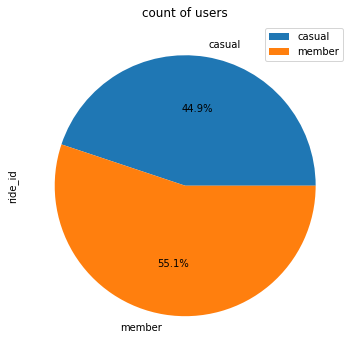

In [14]:
count_member_type.plot.pie(y='ride_id',autopct='%1.1f%%', figsize=(8,6))
plt.title('count of users')
plt.legend()

<h2>Number of ride by bike type<h2>

In [15]:
ride_type2 = pd.pivot_table(case_1, index= ['rideable_type'], aggfunc={'rideable_type':np.size})
ride_type2

,rideable_type
rideable_type,
classic_bike,3403573
docked_bike,328000
electric_bike,2091986


In [16]:
ride_type3 = pd.pivot_table(case_1, index= ['rideable_type','member_casual'], aggfunc={'rideable_type':np.size})
ride_type3
#classic > electric> docked

rideable_type
rideable_type member_casual               
classic_bike  casual               1312185
              member               2091388
docked_bike   casual                327999
              member                     1
electric_bike casual                972854
              member               1119132

In [17]:
# usage of bike type per month by member type
ride_type = pd.pivot_table(case_1, index= ['member_casual', 'month', 'rideable_type'], aggfunc={'rideable_type':np.size})
ride_type= ride_type.rename(columns={'rideable_type':'total_bike'})
ride_type = ride_type.reset_index()
ride_type

,member_casual,month,rideable_type,total_bike
0,casual,1,classic_bike,8259
1,casual,1,docked_bike,2105
2,casual,1,electric_bike,7753
3,casual,2,classic_bike,5695
4,casual,2,docked_bike,1271
...,...,...,...,...
56,member,10,electric_bike,163434
57,member,11,classic_bike,122173
58,member,11,electric_bike,130876
59,member,12,classic_bike,80829


<h3>By month<h3>

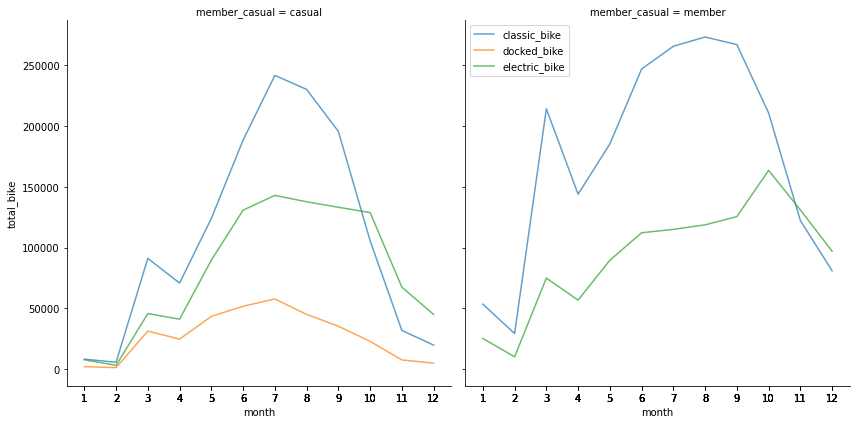

In [18]:
g= sns.FacetGrid(ride_type, col='member_casual', hue='rideable_type', height=6)
g.map(sns.lineplot, 'month','total_bike', alpha=0.7)
g.set(xticks=ride_type.month)
plt.legend()
plt.show()

In [19]:
# usage of bike type per day by member type
ride_type_day = pd.pivot_table(case_1, index= ['member_casual', 'week_day', 'rideable_type'], aggfunc={'rideable_type':np.size})
ride_type_day= ride_type_day.rename(columns={'rideable_type':'total_bike'})
ride_type_day = ride_type_day.reset_index()
ride_type_day.head()

,member_casual,week_day,rideable_type,total_bike
0,casual,Friday,classic_bike,181102
1,casual,Friday,docked_bike,43185
2,casual,Friday,electric_bike,147570
3,casual,Monday,classic_bike,142278
4,casual,Monday,docked_bike,38814


<h3>By weekday<h3>

<Figure size 1080x576 with 0 Axes>

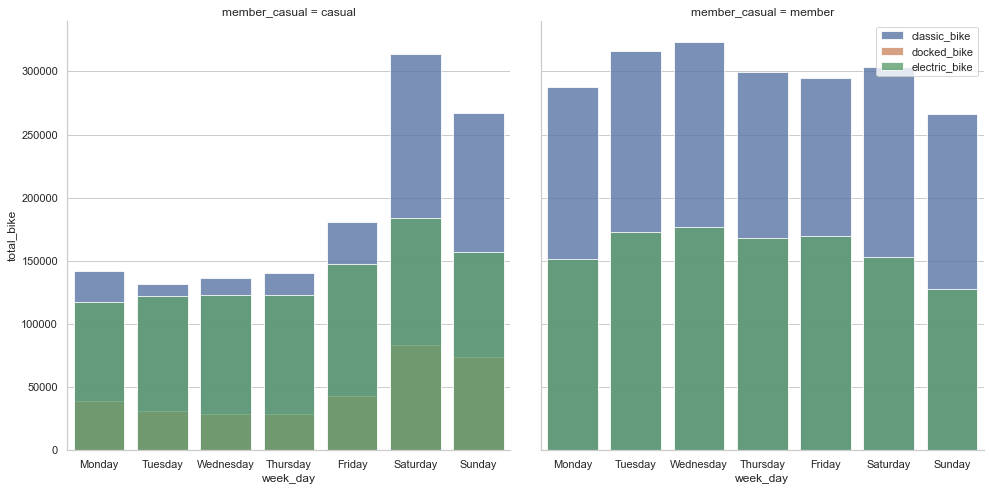

In [20]:
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
plt.figure(figsize=(15,8))
sns.set_theme(style="whitegrid")
g= sns.FacetGrid(ride_type_day, col='member_casual', hue='rideable_type', height=4)
g.map(sns.barplot, 'week_day','total_bike', order = day_order,alpha=0.8)
g.fig.set_size_inches(15,8)
plt.legend()
plt.show()

In [21]:
from statistics import mode
mode(case_1['week_day'])

'Saturday'

In [22]:
mode_week_day_casual = case_1[case_1['member_casual']=='member']
mode_week_day_casual = mode_week_day_casual['week_day'].mode()
mode_week_day_casual

0    Wednesday
Name: week_day, dtype: object

In [23]:
ride_weekday = pd.pivot_table(case_1, index=['week_day','member_casual'], aggfunc={'member_casual':np.size})
ride_weekday= ride_weekday.rename(columns={'member_casual':'total_ride'})
ride_weekday = ride_weekday.reset_index()
ride_weekday

,week_day,member_casual,total_ride
0,Friday,casual,371857
1,Friday,member,464308
2,Monday,casual,298366
3,Monday,member,439047
4,Saturday,casual,580090
5,Saturday,member,456209
6,Sunday,casual,498485
7,Sunday,member,394427
8,Thursday,casual,291552
9,Thursday,member,467502


In [24]:
ride_weekday.reset_index()
ride_weekday

,week_day,member_casual,total_ride
0,Friday,casual,371857
1,Friday,member,464308
2,Monday,casual,298366
3,Monday,member,439047
4,Saturday,casual,580090
5,Saturday,member,456209
6,Sunday,casual,498485
7,Sunday,member,394427
8,Thursday,casual,291552
9,Thursday,member,467502


<h2>Number of ride by weekday<h2>

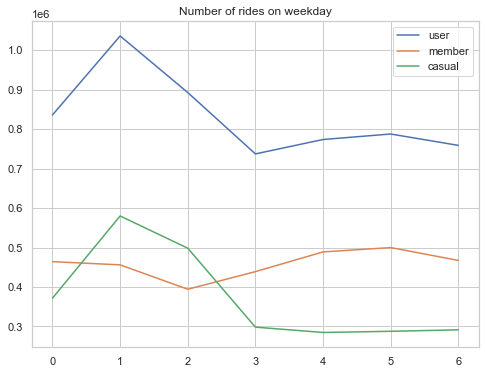

In [25]:
#plot graph of weekday frequency
plt.figure(figsize= (8,6))
plt.plot(case_1.groupby('week_day',sort=False)['ride_id'].count().values)
plt.plot( case_1[case_1['member_casual']=='member'].groupby('week_day',sort=False)['ride_id'].count().values)
plt.plot(case_1[case_1['member_casual']=='casual'].groupby('week_day',sort=False)['ride_id'].count().values)
plt.title('Number of rides on weekday')
plt.legend(['user', 'member', 'casual'])
# plt.xticks(ca)
plt.show()

Users ride most on Saturday
<p>Casual riders prefer riding on Saturday and Sunday (weekend)</p>
<p>Members' number of ride is the same on weekday (commute to work), the fewest day is Sunday</p>

<h3>By month<h3>

In [26]:
member_type_month = pd.pivot_table(case_1, index='month', columns='member_casual', values='ride_id',aggfunc='count')
member_type_month

member_casual,casual,member
month,,
1,18117,78717
2,10131,39491
3,168066,288926
4,136601,200629
5,256916,274717
6,370681,358914
7,442056,380354
8,412671,391681
9,363890,392257


Text(0.5, 1.0, 'Number of rides in month')

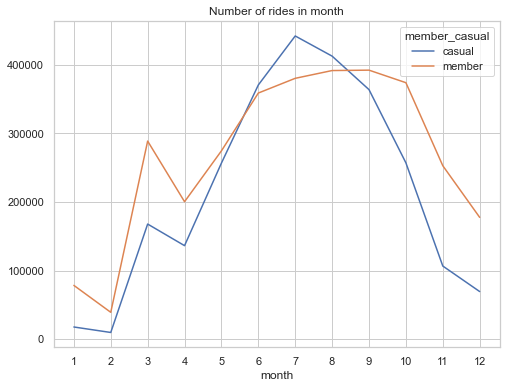

In [27]:
member_type_month.plot(figsize =(8,6))
# plt.plot(case_1.groupby('month')['ride_id'].count().values,case_1['month'].unique)
plt.xticks(member_type_month.index)
# plt.xlim([1,12])
plt.title('Number of rides in month')

Casual riders ride most in July.
Member riders ride most from May to October.

In [28]:
# #plot graph of month frequency
# plt.figure(figsize= (8,6))
# plt.plot(member_type_month.groupby('month',sort=False)['ride_id'].count().values)
# plt.plot( member_type_month[member_type_month['member_casual']=='member'].groupby('month',sort=False)['ride_id'].count().values)
# plt.plot(member_type_month[member_type_month['member_casual']=='casual'].groupby('month',sort=False)['ride_id'].count().values)
# plt.title('Number of rides in month')
# plt.legend(['user', 'member', 'casual'])
# # plt.xticks(ca)
# plt.show()

<h3>By start time<h3>

In [29]:
member_type_hour = pd.pivot_table(case_1, index='start_hour', columns='member_casual', values='ride_id',aggfunc='count')
member_type_hour

member_casual,casual,member
start_hour,,
0,55123,34109
1,40044,22521
2,25832,12680
3,14259,7345
4,10160,8465
5,12821,31449
6,26321,85933
7,47872,156940
8,65219,180776


Text(0.5, 1.0, 'Number of rides in start time')

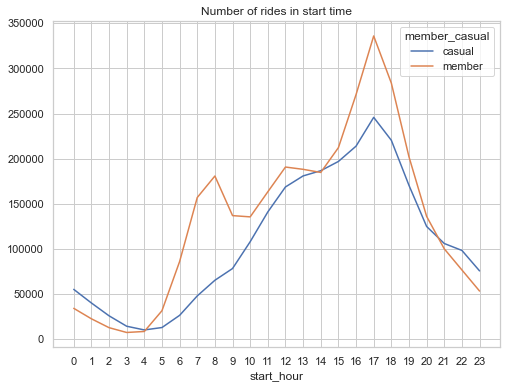

In [30]:
member_type_hour.plot(figsize =(8,6))
# plt.plot(case_1.groupby('month')['ride_id'].count().values,case_1['month'].unique)
plt.xticks(member_type_hour.index)
# plt.xlim([1,12])
plt.title('Number of rides in start time')

<h2>Ride length<h2>

In [45]:
user_avg_ride_m= pd.pivot_table(case_1, index='month', columns='member_casual', values='ride_length',aggfunc=np.mean)
user_avg_ride_m

member_casual,casual,member
month,,
1,25.684590,12.871936
2,49.373229,18.022085
3,38.158731,13.969955
4,38.022990,14.688832
5,38.230966,14.638909
6,37.121432,14.677786
7,32.790172,14.239318
8,28.786370,14.100812
9,27.814990,13.734457


Text(0.5, 1.0, 'Average ride length by month')

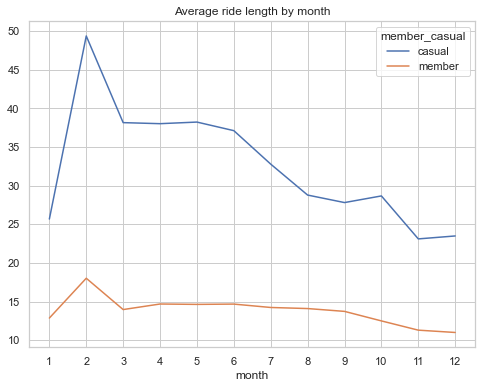

In [46]:
user_avg_ride_m.plot(figsize =(8,6))
# plt.plot(case_1.groupby('month')['ride_id'].count().values,case_1['month'].unique)
plt.xticks(user_avg_ride_m.index)
# plt.xlim([1,12])
plt.title('Average ride length by month')

In [60]:
user_avg_ride_w= pd.pivot_table(case_1, index='week_day',columns= 'member_casual', values='ride_length',aggfunc=np.mean)
# user_avg_ride_w= user_avg_ride_w.rename(columns={'ride_length':'avg_ride_length'})
# user_avg_ride_w = user_avg_ride_w.reset_index()
user_avg_ride_w

member_casual,casual,member
week_day,,
Friday,30.324082,13.302639
Monday,32.367896,13.293092
Saturday,34.995022,15.295315
Sunday,37.693197,15.677598
Thursday,27.752829,12.751772
Tuesday,28.267254,12.821334
Wednesday,27.690464,12.822820


Text(0.5, 1.0, 'Average ride length by weekday')

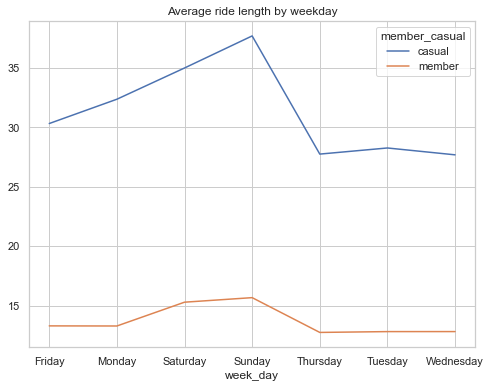

In [61]:
user_avg_ride_w.plot(figsize =(8,6))
# plt.plot(case_1.groupby('month')['ride_id'].count().values,case_1['month'].unique)
# plt.xticks(user_avg_ride_w.index)
# plt.xlim([1,12])
plt.title('Average ride length by weekday')

<h2>Station<h2>

<h3>Start station<h3>

In [31]:
start_station = pd.pivot_table(case_1, index=['start_station_name'],values=['start_lat', 'start_lng'], aggfunc={'start_station_name':np.size, 'start_lat': np.median,'start_lng':np.median})
start_station= start_station.rename(columns={'start_station_name':'num_trip','start_lat':'medlat','start_lng':'medlng'})
start_station = start_station.reset_index()
start_station

,start_station_name,medlat,medlng,num_trip
0,2112 W Peterson Ave,41.991178,-87.683593,1103
1,351,41.930000,-87.780000,2
2,63rd St Beach,41.780911,-87.576324,2225
3,900 W Harrison St,41.874754,-87.649807,8831
4,Aberdeen St & Jackson Blvd,41.877726,-87.654787,12669
...,...,...,...,...
842,Woodlawn Ave & 55th St,41.795264,-87.596471,8157
843,Woodlawn Ave & 75th St,41.759160,-87.595751,71
844,Woodlawn Ave & Lake Park Ave,41.814093,-87.597005,1927
845,Yates Blvd & 75th St,41.758768,-87.566440,244


In [32]:
#Top 5 start station used by users
start_station_top5 = start_station.sort_values(by=['num_trip'], ascending=False).head(5)
start_station_top5

,start_station_name,medlat,medlng,num_trip
737,Streeter Dr & Grand Ave,41.892278,-87.612043,84789
527,Michigan Ave & Oak St,41.900960,-87.623777,45863
788,Wells St & Concord Ln,41.912133,-87.634656,45240
533,Millennium Park,41.881032,-87.624084,43980
152,Clark St & Elm St,41.902973,-87.631280,43153


In [33]:
#Geolocation Top 5 start station used by users
import plotly_express as px
mapbox_access_token = 'pk.eyJ1IjoiaGFtaWJvIiwiYSI6ImNrN2N2Ym5uYTAybzEzb256cmk2NGtjeTUifQ.3qaqDjFrZdS3sqeoPeJG-w'
px.set_mapbox_access_token(mapbox_access_token)
fig = px.scatter_mapbox(start_station_top5, color='num_trip', color_continuous_scale=px.colors.sequential.matter,
    lat ='medlat', lon= 'medlng', size ='num_trip', zoom=11, opacity=0.5, text='start_station_name', 
    hover_name="start_station_name", hover_data=["start_station_name", "num_trip"])
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0}, height=500, width=600)
fig.show()

In [34]:
#def top5 function
import plotly_express as px
mapbox_access_token = 'pk.eyJ1IjoiaGFtaWJvIiwiYSI6ImNrN2N2Ym5uYTAybzEzb256cmk2NGtjeTUifQ.3qaqDjFrZdS3sqeoPeJG-w'
def top5_station(station:str,usertype:str):
    stationtype= station + '_station_name'
    stationlat= station + '_lat'
    stationlng = station + '_lng'
    station = pd.pivot_table(case_1[case_1.member_casual==usertype], index=[stationtype],values=[stationlat, stationlng], aggfunc={stationtype:np.size, stationlat: np.median,stationlng:np.median})
    station= station.rename(columns={stationtype:'num_trip',stationlat:'medlat',stationlng:'medlng'})
    station = station.reset_index()
    station_top5 = station.sort_values(by=['num_trip'], ascending=False).head(5)
    px.set_mapbox_access_token(mapbox_access_token)
    fig = px.scatter_mapbox(station_top5, color='num_trip', color_continuous_scale=px.colors.sequential.matter,
        lat ='medlat', lon= 'medlng', size ='num_trip', zoom=11, opacity=0.5, text=stationtype, 
        hover_name=stationtype, hover_data=[stationtype, "num_trip"])
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0}, height=500, width=600)
    fig.show()
    return station_top5

In [35]:
#top 5 start stations of member riders
top5_station('start','member')

,start_station_name,medlat,medlng,num_trip
151,Clark St & Elm St,41.902973,-87.631280,26063
778,Wells St & Concord Ln,41.912133,-87.634656,24811
401,Kingsbury St & Kinzie St,41.889177,-87.638506,24720
779,Wells St & Elm St,41.903222,-87.634324,22082
227,Dearborn St & Erie St,41.893992,-87.629318,20710


In [36]:
#Top 5 start station used by casual users
top5_station('start','casual')

,start_station_name,medlat,medlng,num_trip
734,Streeter Dr & Grand Ave,41.892278,-87.612043,67864
532,Millennium Park,41.881032,-87.624084,35021
526,Michigan Ave & Oak St,41.900960,-87.623777,30654
662,Shedd Aquarium,41.867226,-87.615355,24307
737,Theater on the Lake,41.926277,-87.630834,22136


Casual riders tend to use the bike in the park, entertainment center (aquarium), near the riverside or by the riverside.
For leisure

<h3>End station<h3>

In [37]:
#Top 5 end station used by member users
mem_end_station = pd.pivot_table(case_1[case_1.member_casual=='member'], index=['end_station_name'],values=['end_lat', 'end_lng'], aggfunc={'end_station_name':np.size, 'end_lat': np.median,'end_lng':np.median})
mem_end_station= mem_end_station.rename(columns={'end_station_name':'num_trip','end_lat':'medlat','end_lng':'medlng'})
mem_end_station = mem_end_station.reset_index()
mem_end_station

,end_station_name,medlat,medlng,num_trip
0,2112 W Peterson Ave,41.991178,-87.683593,673
1,63rd St Beach,41.780943,-87.576298,694
2,900 W Harrison St,41.874754,-87.649807,6189
3,Aberdeen St & Jackson Blvd,41.877726,-87.654787,8665
4,Aberdeen St & Monroe St,41.880419,-87.655519,7974
...,...,...,...,...
822,Woodlawn Ave & 55th St,41.795264,-87.596471,4881
823,Woodlawn Ave & 75th St,41.759160,-87.595751,11
824,Woodlawn Ave & Lake Park Ave,41.814093,-87.597005,898
825,Yates Blvd & 75th St,41.758768,-87.566440,40


In [38]:
mem_end_station_top5 = mem_end_station.sort_values(by=['num_trip'], ascending=False).head(5)
mem_end_station_top5

,end_station_name,medlat,medlng,num_trip
149,Clark St & Elm St,41.902973,-87.631280,26313
769,Wells St & Concord Ln,41.912133,-87.634656,25525
396,Kingsbury St & Kinzie St,41.889177,-87.638506,24783
770,Wells St & Elm St,41.903222,-87.634324,22696
225,Dearborn St & Erie St,41.893992,-87.629318,21526


In [39]:
#Geolocation Top 5 end station used by casual users
mapbox_access_token = 'pk.eyJ1IjoiaGFtaWJvIiwiYSI6ImNrN2N2Ym5uYTAybzEzb256cmk2NGtjeTUifQ.3qaqDjFrZdS3sqeoPeJG-w'
px.set_mapbox_access_token(mapbox_access_token)
fig2= (px.scatter_mapbox(mem_end_station_top5, color='num_trip',
                        color_continuous_scale=px.colors.sequential.matter,
                        lat ='medlat', lon= 'medlng', size ='num_trip',
                        zoom=12, opacity=0.5, text='end_station_name'))

fig2.update_layout(margin={"r":0,"t":0,"l":0,"b":0},height=500, width=600)
fig2.show()

In [40]:
#top 5 end stations by member riders
top5_station('end','member')

,end_station_name,medlat,medlng,num_trip
149,Clark St & Elm St,41.902973,-87.631280,26313
769,Wells St & Concord Ln,41.912133,-87.634656,25525
396,Kingsbury St & Kinzie St,41.889177,-87.638506,24783
770,Wells St & Elm St,41.903222,-87.634324,22696
225,Dearborn St & Erie St,41.893992,-87.629318,21526


In [41]:
#top 5 end station by casual riders
top5_station('end','casual')

,end_station_name,medlat,medlng,num_trip
734,Streeter Dr & Grand Ave,41.892278,-87.612043,70209
531,Millennium Park,41.881032,-87.624084,36070
525,Michigan Ave & Oak St,41.900960,-87.623777,32211
737,Theater on the Lake,41.926277,-87.630834,23649
662,Shedd Aquarium,41.867226,-87.615355,22484


Start and end at the same station (mostly)

In [42]:
millen=case_1[case_1['start_station_name']=='Streeter Dr & Grand Ave']
millenend = pd.pivot_table(millen, index=['end_station_name'], aggfunc={'end_station_name':np.size})
millenend= millenend.rename(columns={'end_station_name':'num_trip'})
millenend = millenend.reset_index()
millenend

,end_station_name,num_trip
0,2112 W Peterson Ave,1
1,63rd St Beach,16
2,900 W Harrison St,31
3,Aberdeen St & Jackson Blvd,22
4,Aberdeen St & Monroe St,50
...,...,...
477,Wood St & Hubbard St,14
478,Wood St & Milwaukee Ave,37
479,Wood St & Taylor St (Temp),3
480,Woodlawn Ave & 55th St,26
